## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve $(Kreis\space oder\space Ellipse)$ , wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [11]:
from pylab import *
%matplotlib inline

In [12]:
data=np.loadtxt('orbit.dat')
print(data.shape)
N = data.shape[0] # N ist die Anzahl der Zeilen in data.
x = data[:,0] # x ist ein Vektor mit den x-Werten aus data.
y = data[:,1] # y ist ein Vektor mit den y-Werten aus data.

(200, 2)


In [13]:
A = np.zeros(N*5) # Erzeugt eine leere Matrix A mit gleich vielen Zeilen wie data und 5 Spalten für die fünf Unbekannten.
A.shape = (N,5)

A[:,0] = x**2 # Alle Elemente der erste Spalte werden quadriert.
A[:,1] = x * y # Alle Elemente x der zweiten Spalte werden mit den Elenten y multipliziert.
A[:,2] = y**2 # Die dritte Spalte wird mit den Quadraten der y-Werte ausgefüllt.
A[:,3] = x # Die vierte Spalte wird zu den x-Werten.
A[:,4] = y # Die fünfte Spalte wird zu den y-Werten.

A_trans = A.transpose() # Erstellt die transponierte Matrix A.
b = np.ones(N) # Erstellt einen Vektor b aus Einsen mit der Länge N.

A_new = A_trans.dot(A) # Multipliziert die Matrix A mit ihrer transponierten Matrix.
b_new = A_trans.dot(b) # Multipliziert den Vektor b mit der transponierten Matrix.
c = np.linalg.solve(A_new,b_new) # Löst das lineare Gleichungssystem.
print(c)

[ 0.9827333   0.95673125  0.95861779  1.00987493  1.02591762]


In [14]:
def Kegelschnitt (A,B,C) : # Gibt die Form des Kegelschnitts an.
    F = B**2-4*A*C   # Ist die oben genannte Formel.      
    if F < 0: # Greift,wenn F kleiner 0.
        return "Geschlossene Kurve"
    elif F == 0: # Greift, wenn F gleich 0.
        return "offene Kurve"
    else: # Greift in jedem anderen Fall.
        return "Hyperbel"
Kegelschnitt (c[0], c[1], c[2])

'Geschlossene Kurve'

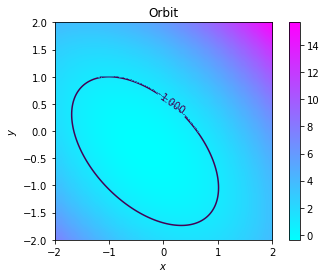

In [18]:
fig1, ax1 = plt.subplots(ncols=1,nrows=1) # Erstellt einen Plot und die Axen.
plt.title("Orbit") # Gibt dem Plot einen Titel.
plt.xlabel("$x$") # Beschriftet die x-Achse.
plt.ylabel("$y$") # Beschriftet die y-Achse.
X,Y = meshgrid(linspace(-2,2,200),linspace(-2,2,200)) # Erstellt aus zwei Containern mit jeweils x und y-Werten zwei 2D Arrays X und Y.
f = c[0] * X**2 + c[1] * X * Y + c[2] * Y**2 + c[3] * X + c[4] * Y # Ist die Funktion des Kegelschnittes in Abhängigkeit von X und Y.
plt.imshow(f,interpolation='none',origin='lower',extent=[-2,2,-2,2],cmap="cool")# Plottet f in Abhängigkeit von X und Y.
colorbar() # Erstellt eine Farbskala neben dem Plot.
cp = plt.contour(X,Y,f,[1.0]) # Erstellt eine Konturlinie für alle Werte bei denen gilt f(X,Y) = 1.
clabel(cp)                                                                      
plot(x,y,',') # Plottet einzelne, unverbundene y-Werte aus data in Abhängigkeit der x-Werte aus data.
fig1.savefig("Orbit.pdf", facecolor='w', edgecolor='w', format="pdf", transparent=False) # Speichert die Grafik als PDF.
show() # Zeigt das Ergebnis.      

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.